In [9]:
source("~/ws/my.source.R")
options(stringsAsFactors=F)

suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(ggsci))
source("~/ws/colors.R")

In [11]:
## Ex. NaiveCD4
lineage_tmp = "CD4"
cluster_tmp = "NaiveCD4"
mincell_tmp = 10
PC_tmp   =20
sigma_tmp=0.25
prune_tmp=0.05
res_tmp  =0.35

In [12]:
## Demo input file in data dir
R4_C0=fread_FT(paste0("data/",lineage_tmp,"_",cluster_tmp,"_mincell",mincell_tmp,"_PC",PC_tmp,"_sigma",sigma_tmp,"_res_",res_tmp,"_idlist.txt"))%>%
      mutate(anno_final=ifelse(cluster==0,"NaiveCD4-0",
                     ifelse(cluster==1,"NaiveCD4-1",
                     ifelse(cluster==2,"NaiveCD4-2",
                     ifelse(cluster==4,"NaiveCD4-3",
                     ifelse(cluster==3,"NaiveCD4-4",
                     ifelse(cluster==5,"NaiveCD4-5",
                     ifelse(cluster==6,"NaiveCD4-6",NA
                     ))))))))
table(R4_C0$anno_final) # cell_state id: consistent orders across all cell types


NaiveCD4-0 NaiveCD4-1 NaiveCD4-2 NaiveCD4-3 NaiveCD4-4 NaiveCD4-5 NaiveCD4-6 
     81706      58974      40457      11490      14515       5849       3701 

In [13]:
# umap
umap_C0=fread_FT(paste0("data/",lineage_tmp,"_",cluster_tmp,"_mincell",mincell_tmp,"_PC",PC_tmp,"_sigma",sigma_tmp,"_postUMAP.txt"))%>%
        left_join(.,R4_C0,by="cell_id")
dim(umap_C0)

[1] 216692      5

In [14]:
umap_C0$anno_final=factor(umap_C0$anno_final,levels=c(paste0("NaiveCD4-",0:6)))
col_list=brewer.pal(9,"Reds")[3:9]

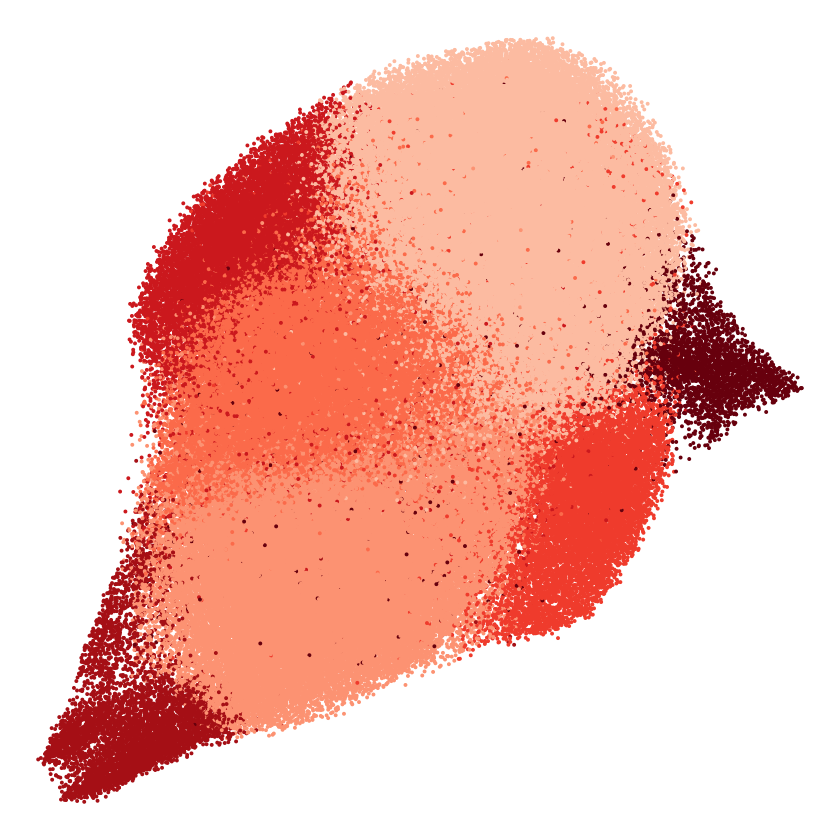

In [16]:
ggplot(umap_C0,aes(x=UMAP_1,y=UMAP_2,color=anno_final))+
    geom_point(size=0.05)+
    theme_void()+
    scale_color_manual(values = col_list) +
    theme(axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.title.x=element_blank(),
          axis.title.y=element_blank(),
          plot.title=element_blank(),
          legend.position="none")
## NaiveCD4 UMAP in Fig2a